### Importowanie bibliotek

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


### Generowanie zmyślonych danych do trenowanie

In [2]:
observations = 1000

xs = np.random.uniform(low = -10, high = 10, size=(observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

inputs = np.column_stack((xs, zs))

print(inputs.shape)

(1000, 2)


### Stworzenie docelowych danych (dla modelu liniowego)
np. f(x,z) = 2*x - 3*z + 5 + szum

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise

print(targets.shape)

(1000, 1)


### Wyrysowanie danych

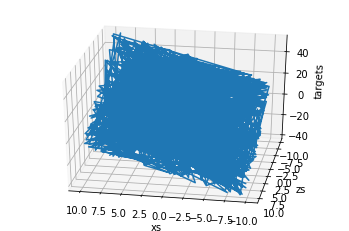

In [4]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

### Tworzenie zmiennych

In [5]:
init_range = 0.1

weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range, init_range, size=1)

print(weights)
print(biases)

[[ 0.02538617]
 [-0.04072528]]
[-0.05816401]


### Ustawienie learning_rate

In [10]:
learning_rate = 0.001

### Trenowanie modelu

In [11]:
for i in range(10000):
    outputs = np.dot(inputs, weights) + biases
    
    deltas = outputs - targets
    
    
    loss = np.sum(np.absolute(deltas))  / observations
    print(loss)
    
    deltas_signs = np.sign(deltas)
    
    deltas_signs[deltas_signs == 0] = 1
                  
                  
    weights = weights - learning_rate * np.dot(inputs.T, deltas_signs)
    
    biases = biases - learning_rate * np.sum(deltas_signs)

128.41468708900206
101.63361143235487
74.85380955359622
48.07492362097974
21.302229747158375
5.485806319796515
21.220532481525087
5.563849683399908
21.17472785873041
5.609253142655904
21.113154407321883
5.671648949120434
21.068471370837976
5.72062806366465
21.00227489070799
5.784323090078843
20.95441886659032
5.833968974745158
20.90448126911014
5.883511424173588
20.85352925171473
5.934303880630956
20.810302198021336
5.9773595991137
20.75935018062593
6.028172479598761
20.709276325571533
6.078165300259367
20.658199405446663
6.1290306341612615
20.605897679439497
6.182971308160801
20.55398011536307
6.233332407416994
20.50959668529612
6.277585971084532
20.456939986026345
6.331518258032153
20.412142027216802
6.374543216613501
20.3785228435852
6.406076557433555
20.337445462526162
6.4491367231546315
20.300806270726216
6.484237939781913
20.25817845748389
6.526787886960363
20.215550644241564
6.569355211002099
20.18041796456979
6.603884425184548
20.146153032579573
6.640171064792272
20.12149136737

9.604606740139348
17.17707487589508
9.601792846841203
17.179899708429836
9.60427960755003
17.16588231241857
9.613623976044362
17.156461037375696
9.622977601879747
17.14838663420706
9.6292262559451
17.142113526477196
9.637433458723772
17.140207192514072
9.642177714364689
17.139610991517774
9.639363821066546
17.142333563624916
9.639954357849579
17.137628517681044
9.64641715011029
17.125614334371665
9.656228179774095
17.115241982382265
9.664190514032697
17.105820707339387
9.673534882527035
17.096399432296508
9.682933910841543
17.088350558948246
9.689182564906892
17.082073937106806
9.695431218972248
17.075823965367004
9.703498254520488
17.07429838974857
9.70493268988683
17.07554110677337
9.703593495389741
17.078262157751983
9.700779602091597
17.080983208730597
9.697981056296282
17.082244207209783
9.695666384481093
17.085985336513776
9.691815756109136
17.089899818492217
9.694172607807626
17.0778745838615
9.701737492516376
17.069667913506798
9.709931012103786
17.0676300714073
9.7164233439779

10.298916699648963
16.48122131503204
10.295147686119424
16.486605721956263
10.293711329369293
16.481932231561558
10.297703689791902
16.47366021150724
10.305817432375854
16.469734341318762
10.311219732291068
16.464314620261153
10.317167431080609
16.46463482623471
10.311873865485074
16.469774866731125
10.311385895394436
16.47027279185716
10.307535267022478
16.474118984072913
10.306226631023915
16.469356606019332
10.31162893093913
16.46393654996524
10.317031230854344
16.4585205934503
10.322916915526031
16.458890741701612
10.3176233499305
16.463999453399747
10.31713537983986
16.464527680092537
10.311842551612447
16.468271411077783
10.308099552708397
16.473630025956233
10.306712121865633
16.468939359293714
10.309454341569959
16.46188665126739
10.31766262256174
16.45789656764757
10.323064922476954
16.452476511593474
10.32846722239217
16.44705645553938
10.333869522307385
16.44164379911832
10.339863888126951
16.441959450606436
10.33457032253142
16.447106406979774
10.33408235244078
16.447611293

16.27995177967135
10.49788630530654
16.282301885911973
10.494130594989361
16.28762026958036
10.492657577953583
16.28474496638251
10.493873914392909
16.287865914248666
10.48858034879738
16.293121065750544
10.487189326937035
16.288393877449646
10.4899485534891
16.28133113989158
10.498139827633139
16.277366054296746
10.503542127548354
16.271945998242646
10.508944427463568
16.266535424492634
10.514954021450338
16.266915210270234
10.509660455854807
16.272025828580833
10.505858216450335
16.274357959927322
10.50207487713515
16.27810169091256
10.498325304410981
16.283423106800964
10.4968577216466
16.28054539238671
10.498068623814529
16.283665719249253
10.492775058218996
16.28892390297115
10.491394963173121
16.284202269048706
10.494162128733713
16.277129777512247
10.502345463869226
16.27316748175464
10.507747763784442
16.26774742570054
10.513150063699657
16.262333730352633
10.519148730871956
16.262715015270825
10.513855165276423
16.26782068431023
10.510046788278945
16.270157764927912
10.5062634

10.570331868042045
16.200905421170106
10.578459549051564
16.197009317062946
10.584465070262503
16.19742670476881
10.579171504666972
16.202529704398255
10.575355162247645
16.204869454425893
10.57157861475908
16.21020133473576
10.5700889128767
16.211766135801124
10.564795347281171
16.21684519400265
10.558413309151831
16.223255363659042
10.557059183128757
16.218506139986367
10.561305880733522
16.214239636637878
10.565298643506152
16.205965959876522
10.573411983740083
16.202066921039567
10.5793963190392
16.20248017181054
10.574102753443668
16.2075800689903
10.567720715314328
16.213993611408327
10.566251848010799
16.211194859719072
10.564101376436554
16.21758810839773
10.56267577825997
16.21283307192607
10.568078078175187
16.20741301587197
10.5734803780904
16.201994346573663
10.579483024940107
16.20238566707823
10.574189459344577
16.207491211111517
10.567807421215239
16.213919357965306
10.566328813266065
16.211106001840285
10.564188082337463
16.21751385495471
10.56274417261029
16.2127650982

16.21738998385289
10.562060147750525
16.213417001383664
10.567462447665742
16.207997525758838
10.573515312963258
16.20835295428653
10.568221747367726
16.213469261511694
10.561839709238388
16.219911015672587
10.56035000735601
16.221553119156695
10.555056441760478
16.226621023768388
10.551205813388519
16.230538183282466
10.5497276399176
16.22767653996047
10.547586474510744
16.234132680271866
10.546143918071287
16.229412298982048
10.548852954160749
16.22237424716129
10.557103534263785
16.220369431374113
10.557502703175546
16.22271701409236
10.553748308003822
16.22799761429575
10.5522643422611
16.22514232804954
10.550128969126044
16.23159211128515
10.548675179354879
16.226869374055227
10.552676921296777
16.21859376910295
10.56078128236144
16.21470150935116
10.566758051321633
16.21511789040556
10.5614644857261
16.220215884230075
10.555082447596764
16.22662811112538
10.553619336368023
16.221884076388008
10.559021636283239
16.21646402033391
10.564423936198454
16.211043964279813
10.56982623611

10.578234152265134
16.19723872852566
10.583636452180349
16.191829863111966
10.589649281701103
16.192240921895433
10.584355716105568
16.197344735287963
10.580541960717461
16.19968367155252
10.57676282619768
16.205021530372466
10.575273124315299
16.206580352927755
10.56997955871977
16.211661489164456
10.56359752059043
16.218075559295748
10.56223608625754
16.213327998002033
10.56648287919713
16.210937598700333
10.564332109404436
16.217372304194203
10.562908524375613
16.21263673434436
10.565642549774157
16.2055885289745
10.573859025071718
16.201615725776715
10.579261324986932
16.196196414961438
10.5853151192918
16.19655628237368
10.580021553696268
16.201672473687996
10.57363951556693
16.208110551943495
10.57214981368455
16.209756447243848
10.56685624808902
16.21482335273133
10.56300561971706
16.21873771955337
10.56152661067772
16.215879752136768
10.559386280839286
16.22233221654277
10.557942795392476
16.217611790652494
10.560651252779065
16.210572792282903
10.568902505023903
16.20857176033

16.19310123014194
10.584785798989468
16.19544041040968
10.581006943198357
16.200777609347565
10.57951724131598
16.20233709178491
10.574223675720448
16.2074183823789
10.567841637591108
16.21383163827085
10.566479233707323
16.20908417744885
10.570726357751122
16.20669449191478
10.568576226405115
16.213128383169305
10.56715167182539
16.20839327095013
10.569884680777642
16.201345001036252
10.578102252097302
16.199388308116827
10.578480321434126
16.20329296274482
10.576990619551747
16.204894186752544
10.571697053956216
16.20997032836197
10.565315015826876
16.216346991668104
10.563945588920461
16.211583350752157
10.568196839951819
16.209246437897853
10.566049604640883
16.21564373656656
10.564618027038533
16.21089056668945
10.570020326953745
16.205470510635354
10.575422626868962
16.200050454581255
10.580824926784175
16.194645476192495
10.586821915910033
16.195074210346213
10.5815283503145
16.200175427723472
10.577707517075392
16.2025169600033
10.57393546040661
16.2078384249869
10.572445758524

16.20105327208454
10.574250129696354
16.20745840614019
10.572786912657648
16.202712570703397
10.578189212572864
16.1972925146493
10.583591512488077
16.1918724585952
10.588993812403293
16.186465812860042
10.595022440965504
16.18687402966755
10.589728875369973
16.19198272998723
10.585921913454605
16.194316779324634
10.582138574139423
16.198060510309876
10.578393723926148
16.203353449008898
10.57691395634734
16.200487088614725
10.578137043329694
16.20362453864657
10.57284347773416
16.208854245179083
10.571444348112845
16.20412783694267
10.574197567472117
16.197058979917788
10.582394848808951
16.193093942107197
10.587797148724167
16.187673886053098
10.593199448639382
16.182264118720042
10.59921715038712
16.182673834668137
10.593923584791591
16.18777841579112
10.587541546662253
16.194182438646177
10.58605487178075
16.191393317978736
10.586470049124866
16.19374269294284
10.582711356005923
16.19905042877054
10.581221654123546
16.200639374318072
10.575928088528013
16.205716926062202
10.5681031

16.19184404600775
10.584756779265549
16.19695348980658
10.580951348847615
16.199286795664833
10.577168009532432
16.20303052665007
10.573421627821721
16.20832703094429
10.571941267717204
16.205459505258343
10.57316494722527
16.208594554986767
10.567871381629738
16.213827827114475
10.566470867224455
16.209102761790106
10.569222070884456
16.202035074894376
10.577421367920559
16.198068476098978
10.582823667835775
16.192648420044883
10.58822596775099
16.18723813669601
10.594245054282698
16.187643851008335
10.588951488687165
16.192749029010766
10.582569450557829
16.19915602058157
10.581082183150615
16.196364077798087
10.581499484517877
16.19871270928304
10.5777392599015
16.20402401070593
10.576249558019121
16.20560939065827
10.570955992423588
16.210686795802697
10.563131017070678
16.218671124984805
10.561187197086726
16.212284525732702
10.567086897783337
16.204164970865214
10.575304128424865
16.20018648260772
10.58070642834008
16.19476642655362
10.586108728255294
16.189352549101862
10.592141

16.216017729680235
10.560544525178942
16.22109446328313
10.552719549826032
16.229084108513682
10.550775451214166
16.222699026054993
10.556674832878107
16.21457947118751
10.56489263233689
16.210600115124446
10.570294932252105
16.205180059070347
10.57569723216732
16.19976582286481
10.581730360727702
16.20014879886737
10.576436795132171
16.205258736304074
10.570054757002833
16.21168163821483
10.568565055120455
16.21334896373754
10.563271489524922
16.218412472122193
10.559420861152965
16.22230880582471
10.557952962059561
16.217596727071253
10.56193723050051
16.20932546466231
10.570059065066122
16.205418924882473
10.57604994334855
16.205822750104975
10.57075637775302
16.210924780204618
10.56437433962368
16.21734480566494
10.562902089596028
16.214539570933383
10.560755000745905
16.220939302654344
10.559322859586011
16.21618683373666
10.564725159501227
16.21076677768256
10.570127459416442
16.205346721628462
10.575529759331657
16.199941422802606
10.581527312015057
16.200366988879747
10.5762337

10.568461076174968
16.21326282834705
10.56698064302955
16.210461002556873
10.564841737297193
16.216857325336456
10.56339395111255
16.212107092702464
10.568796251027765
16.20668703664836
10.57419855094298
16.20126882435169
10.580223385800746
16.20164745667652
10.574929820205217
16.20675735394932
10.568547782075875
16.21318857490403
10.567058080193497
16.214847621546685
10.561764514597966
16.219907222978527
10.557913886226007
16.22381574251391
10.55645428083522
16.219107602006464
10.560442847304154
16.210832316468444
10.568560383841781
16.20692192636935
10.574542968421596
16.207321407914115
10.569249402826063
16.212423397849864
10.562867364696725
16.21885174235414
10.561399313666678
16.216038188578633
10.559248025818949
16.22244623934354
10.55782417836167
16.217693811314675
10.563226478276885
16.21227375526058
10.568628778192101
16.20685369920648
10.574031078107314
16.20144442428949
10.580020337088099
16.201865646688894
10.574726771492566
16.206964574374286
10.568344733363228
16.21336743

16.20343109977636
10.571870433135551
16.209845455396152
10.570399870875828
16.20704589050513
10.568251094257775
16.213439952385553
10.566822534736653
16.208685535119137
10.572224834651868
16.203265479065042
10.577627134567082
16.197846205345357
10.58363274276133
16.198235925742342
10.578339177165798
16.203342241897577
10.571957139036458
16.20977120195313
10.570476836131093
16.206957032626345
10.568337800158684
16.213365698942532
10.566890929086972
16.2086175614862
10.572293229002188
16.2031975054321
10.577695528917403
16.197777449378005
10.583097828832619
16.192368703265494
10.589110111427834
16.192780164517117
10.583816545832303
16.197883931974914
10.58000262328334
16.200222914174205
10.57622365592441
16.205560387362873
10.574733954042033
16.207119595549436
10.569440388446502
16.212200581432306
10.563058350317162
16.218614416286158
10.561697462909809
16.213866735691262
10.565944160514574
16.20960377301277
10.569928559566643
16.201332167200096
10.578050263521137
16.197426307242107
10.5

16.218072126447417
10.56219907406305
16.213333587141094
10.566222954576673
16.205051505123844
10.574305177069611
16.201179135116735
10.580265085477793
16.20162210332287
10.574971519882263
16.206714434237966
10.568589481752925
16.213108126287647
10.567143231076194
16.208357007181288
10.57254553099141
16.20293695112719
10.577947830906625
16.19751925140487
10.58397113025648
16.197901489972942
10.578677564660946
16.203010785630415
10.572295526531608
16.209439375855222
10.570806060857876
16.206625576359183
10.568676187653834
16.213033872844623
10.567211625426513
16.20828903354835
10.572613925341729
16.202868977494255
10.578016225256942
16.197448921440156
10.58341852517216
16.192041749325007
10.589448498922982
16.19244572874772
10.584154933327452
16.197555224920606
10.580349589232139
16.19988847840481
10.576566249916954
16.203632209390044
10.572819781883627
16.208928915713333
10.57133946025515
16.206061319886537
10.572563101287173
16.209196237726736
10.567269535691644
16.214429711883522
10.5

10.575821759226098
16.204402881407173
10.572045615090497
16.209733825403916
10.57055591320812
16.211299562782397
10.565262347612588
16.2163783974289
10.558880309483248
16.222787854327198
10.557526856386808
16.218038445705645
10.561773553991573
16.213771505602452
10.565767196659358
16.205497574104704
10.573879656998136
16.20159932081863
10.579863319370617
16.202013598791815
10.574569753775085
16.20711327241655
10.568187715645747
16.213526102076482
10.566719192690265
16.210728063145318
10.564568376767973
16.217120599065886
10.563143451518023
16.212365286756263
10.568545751433238
16.206945230702168
10.573948051348452
16.201526746352727
10.579950025271526
16.20191909405951
10.574656459675992
16.207024414537766
10.568274421546656
16.21345184863346
10.56679615794553
16.210639205266535
10.56465508266888
16.217046345622865
10.563211845868343
16.212297313123326
10.568614145783558
16.20687725706923
10.574016445698772
16.20145720101513
10.579418745613989
16.19604924427286
10.585427393938032
16.19

10.576453236047248
16.205407172021022
10.571159670451715
16.210483518668845
10.564777632322377
16.216884842866833
10.563431590997807
16.21213337173025
10.567678288602572
16.20786155268347
10.571681661161938
16.199584776023674
10.579784391609133
16.19569526149724
10.585760642209745
16.196121208030437
10.580467076614214
16.201218393656497
10.574085038484874
16.207623090616114
10.572622445615718
16.202877056664143
10.578024745530932
16.197457000610047
10.583427045446147
16.192036944555948
10.588829345361363
16.186630450171414
10.594857349754026
16.187039338187596
10.589563784158495
16.192147941527562
10.585756552737896
16.194482087844683
10.58197321342271
16.198225818829926
10.57822863271467
16.203518133484828
10.576749201849255
16.20065196373102
10.577971952118215
16.203789847166615
10.572678386522684
16.20901892965501
10.571279881070916
16.20429206643769
10.574033885995732
16.19722295727238
10.582230381767022
16.19325842806794
10.587632681682237
16.187838372013843
10.593034981597452
16.

16.196586962473308
10.579866410537303
16.20189540569118
10.578376708654925
16.20348364384854
10.573083143059394
16.20856095894243
10.565258167706482
16.216541996755204
10.56331722018128
16.210153426415978
10.569218236576921
16.20203387154849
10.57743307451334
16.198057057174527
10.582835374428559
16.192637001120428
10.588237674343773
16.18722364688352
10.59426897860815
16.18761471303568
10.588975413012621
16.192723659858252
10.582593374883281
16.199140408424984
10.581103673000904
16.200814877905845
10.575810107405372
16.20587681418538
10.571959479033412
16.20976757603486
10.570493404236013
16.205052407854524
10.574480634199322
16.19677986502329
10.582599507242573
16.192876748901185
10.588588561229
16.19328866427328
10.58329499563347
16.1983897037588
10.576912957504131
16.20480357587509
10.575441314739543
16.202004494487568
10.573293618626353
16.208398072864494
10.571863301762463
16.20364377578674
10.577265601677679
16.198223719732642
10.582667901592895
16.192804174435278
10.58867526712

### Sprawdzenie czy wagi i biases są poprawne
była funkcja f(x,z) = 2x - 3z + 5 + szum

In [12]:
print(weights, biases)

[[2.38833034]
 [0.10857738]] [5.08783599]


### Narysowanie wejść i docelowych wartości

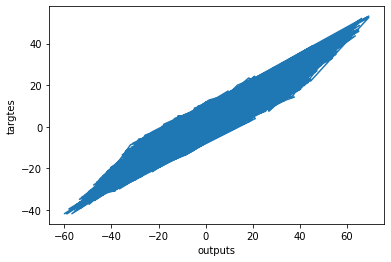

In [13]:

plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targtes')
plt.show()